In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [54]:
datadir_local = "data/mooring/"
datadir       = os.getcwd()+"/../"+datadir_local

In [55]:
# walk through directory to get file names
f = {}
for (dirpath, dirnames, filenames) in os.walk(datadir):
    if any([fn.startswith("GAK1_") for fn in filenames]):
        # thisdir       = dirpath.split("/")[-1]
        fpaths        = [os.path.join(dirpath,fn) for fn in filenames]
        yr            = filenames[0].split("_")[1]
        dpth          = [int(fn.split("_")[2][0:-5]) for fn in filenames]
        fpaths_sorted = [x for _,x in sorted(zip(dpth, fpaths))]   # sort the paths according to depth
        f[yr]         = fpaths_sorted
df_fpaths = pd.DataFrame(f)
df_fpaths

,2018,2017,2019
0,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....
1,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....
2,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....
3,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....
4,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....
5,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....,/home/annegret/Projects/Hubbard2024/mooring/.....


In [41]:
# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_24m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_23m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_25m.dat"]

# fnames   = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_53m.dat"]

# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_157m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_144m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_145m.dat"]

# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_199m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_198m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_198m.dat"]


# df_all = pd.DataFrame(columns=["Date", "Temperature"], index=None)
# for fname in fnames:
#     # figure out how many rows need to be skipped, differs between files
#     num = 0
#     with open(fname) as f:
#         lines = f.readlines()
#         datalines = [i for i, l in enumerate(lines) if not l.startswith("%" )]
#         if len(datalines) > 0: num = datalines[0]
#     # read in
#     dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
#     # change type of date and time to string
#     dfgak_[dfgak_.columns[0:6]] = dfgak_.iloc[:, 0:6].astype('string')
#     # string to datetime
#     Datetr = [dfgak_.iloc[i,0]+"-"+dfgak_.iloc[i,1]+"-"+dfgak_.iloc[i,2] for i in range(dfgak_.shape[0])]
#     # dfgak_["Date"] = pd.to_datetime(datestr)
#     dfgak_["Date"] = [dt.datetime.strptime(d, format).date() for d in datestr]
#     # only take relevant columns and add them to df_all
#     dfgak_out = pd.DataFrame({"Date":dfgak_.Date, "Temperature":dfgak_[8]})      # , "Depth [m]":dfgak_[7]
#     df_all = pd.concat([df_all, dfgak_out])  # normally not the best practice as memory/time inefficient
# df_all

In [83]:
depths   = ["25m", "50m", "100m", "150m", "200m", "250m"]
colnames = ["Date"]
[colnames.append("Temperature [deg C] @ "+d) for d in depths]

def prepare_dfgak(fname):
    # figure out how many rows need to be skipped, differs between files
    num = 0
    with open(fname) as f:
        lines = f.readlines()
        datalines = [i for i, l in enumerate(lines) if not l.startswith("%" )]
        if len(datalines) > 0: num = datalines[0]
    # read in
    dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
    # change type of date and time to string
    dfgak_[dfgak_.columns[0:6]] = dfgak_.iloc[:, 0:6].astype('string')
    # string to datetime
    datestr = [dfgak_.iloc[i,0]+"-"+dfgak_.iloc[i,1]+"-"+dfgak_.iloc[i,2] for i in range(dfgak_.shape[0])]
    format = "%Y-%m-%d"
    dfgak_["Date"] = [dt.datetime.strptime(d, format).date() for d in datestr]
    # only take relevant columns
    dfgak_out = pd.DataFrame({"Date":dfgak_.Date, "Temperature":dfgak_[8]})      # , "Depth [m]":dfgak_[7]
    return dfgak_out

# loop over all depths and years
df_all = pd.DataFrame(index=None)
for r in df_fpaths.iterrows():   # every row corresponds to certain depth
    ir, row = r
    pdtemp = pd.DataFrame(columns=["Date", "Temperature"], index=None)
    for fname in row: # loop over years for this depth
        dfgak_out = prepare_dfgak(fname)
        pdtemp = pd.concat([pdtemp, dfgak_out])
    # sort by date
    pdtemp.sort_values(by=["Date"], inplace=True, ignore_index=True)
    if df_all.empty:
        df_all["Date"] = pdtemp["Date"]
    df_all[colnames[ir+1]] = pdtemp["Temperature"]
df_all

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4419/63327959.py:13: SyntaxWarning: invalid escape sequence '\s'
  dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
/tmp/ipykernel_4419/63327959.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdtemp = pd.concat([pdtemp, dfgak_out])
/tmp/ipykernel_4419/63327959.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdtemp = pd.concat(

,Date,Temperature [deg C] @ 25m,Temperature [deg C] @ 50m,Temperature [deg C] @ 100m,Temperature [deg C] @ 150m,Temperature [deg C] @ 200m,Temperature [deg C] @ 250m
0,2017-04-12,4.346,4.346,4.481,4.871,5.102,5.642
1,2017-04-12,4.349,4.342,4.479,4.859,5.105,5.649
2,2017-04-12,4.357,4.329,4.459,4.873,5.122,5.644
3,2017-04-12,4.404,4.325,4.440,4.872,5.096,5.638
4,2017-04-12,4.347,4.334,4.452,4.847,5.084,5.645
...,...,...,...,...,...,...,...
107879,2020-05-10,5.803,4.959,5.313,5.876,5.974,5.897
107880,2020-05-10,5.816,4.959,5.324,5.881,5.977,5.898
107881,2020-05-10,5.810,4.955,5.313,5.875,5.977,5.897
107882,2020-05-10,5.806,4.920,5.303,5.738,5.973,5.897


In [90]:
# use lowess filter to smooth time series, easier on day index rather than datetime format
t0 = dt.datetime.strptime("2017-01-01", "%Y-%m-%d").date()
t_index_data   = np.zeros(len(df_all.Date), dtype=int)
for (i, da) in enumerate(df_all.Date):
    deltat = da - t0
    t_index_data[i] = deltat.days
lowess = sm.nonparametric.lowess

df_smooth = pd.DataFrame(columns=df_all.columns)
df_smooth["Date"] = df_all["Date"]
for col in df_all[1:]:
    if col == "Date":
        continue
    z = lowess(df_all[col], t_index_data, frac=1/20)
    df_smooth[col] = z[:,1]

df_smooth.to_csv(os.path.join(datadir,"GAK_smooth.csv"), index=False)

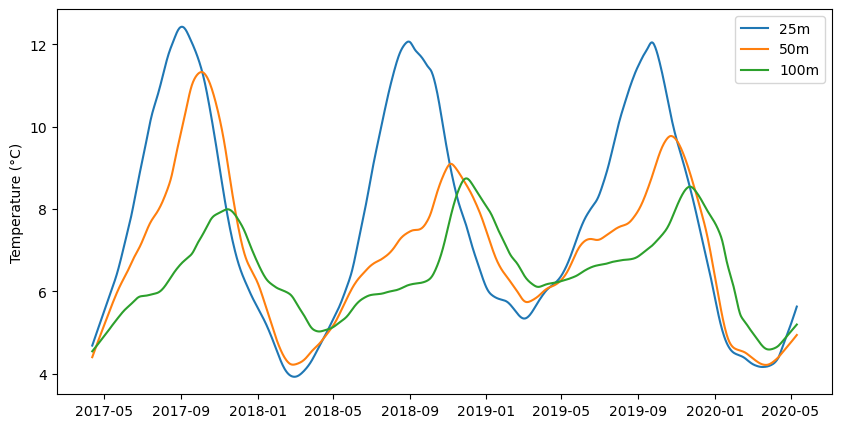

In [94]:
plt.figure(figsize=(10,5))
for (i,col) in enumerate(df_smooth):
    if (col == "Date") or (i > 3):
        continue
    depth = col.split(" ")[-1]
    plt.plot(df_smooth.Date, df_smooth[col], label=depth)

plt.ylabel("Temperature (°C)")
plt.legend()